# ==========================================
# PROJECT: Credit Card Fraud Detection Analysis
# AUTHOR: Gugus Adhi Gumilang
# DATE: 21 February 2026
# ==========================================

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

##  --- 1. Data Acquisition & Preprocessing ---
Download From Kaggle

In [ ]:
path = kagglehub.dataset_download("kartik2112/fraud-detection")
train_path = os.path.join(path, "fraudTrain.csv")
test_path = os.path.join(path, "fraudTest.csv")

# Load and merge datasets for comprehensive analysis
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df = pd.concat([df_train, df_test], ignore_index=True)

100%|██████████| 202M/202M [00:01<00:00, 149MB/s]

Extracting files...


In [ ]:
# Convert temporal data to datetime objects
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

## --- 2. Feature Engineering ---
Extract temporal and demographic features

In [ ]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['age'] = 2020 - df['dob'].dt.year

## Visual Analysis

In [ ]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("viridis")
df_fraud = df[df['is_fraud'] == 1]

### A. Hourly Distribution: Identifying the "Critical Window"

/tmp/ipython-input-1966556201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fraud, x='hour', palette="flare")


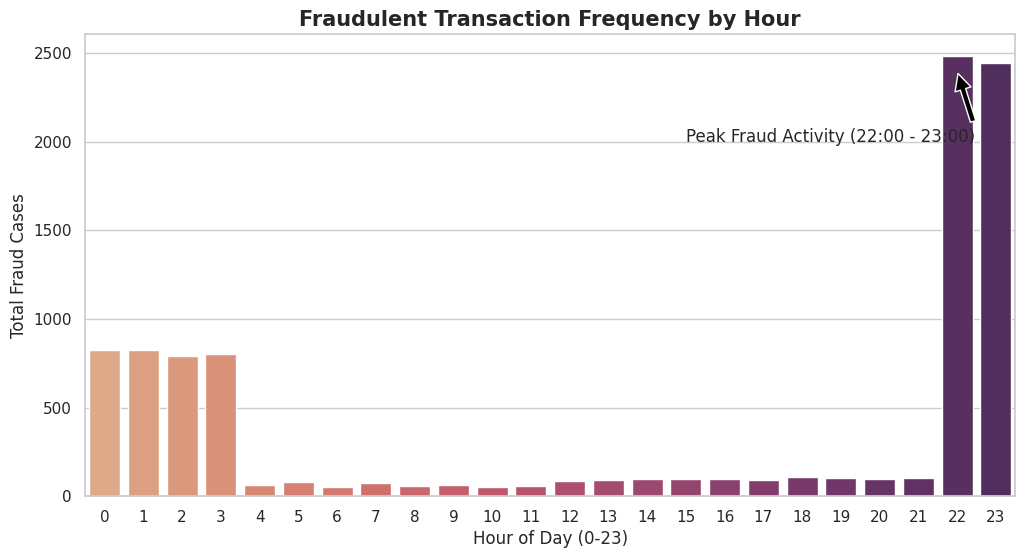

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_fraud, x='hour', palette="flare")
plt.title('Fraudulent Transaction Frequency by Hour', fontsize=15, fontweight='bold')
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Total Fraud Cases', fontsize=12)
plt.annotate('Peak Fraud Activity (22:00 - 23:00)', xy=(22, 2400), xytext=(15, 2000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

Analysis Finding
- Fraudulent activities exhibit a high concentration during late-night hours, specifically between 22:00 and 03:00. This suggests that perpetrators exploit periods when victims are least likely to monitor real-time transaction alerts.


### B. Categorical Analysis: The "Targeted Merchants"

/tmp/ipython-input-2114527443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fraud, y='category', order=category_order, palette="magma")


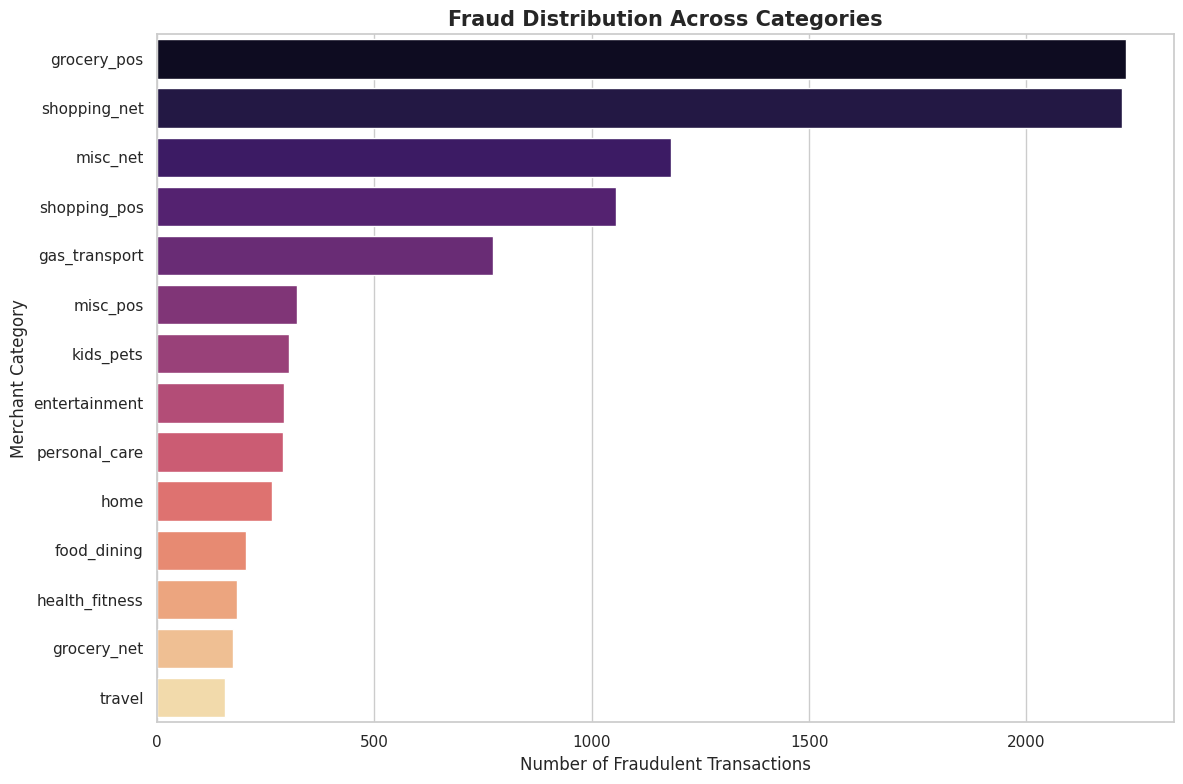

In [ ]:
plt.figure(figsize=(12, 8))
category_order = df_fraud['category'].value_counts().index
sns.countplot(data=df_fraud, y='category', order=category_order, palette="magma")
plt.title('Fraud Distribution Across Categories', fontsize=15, fontweight='bold')
plt.xlabel('Number of Fraudulent Transactions', fontsize=12)
plt.ylabel('Merchant Category', fontsize=12)
plt.tight_layout()
plt.show()

<Axes: xlabel='hour'>

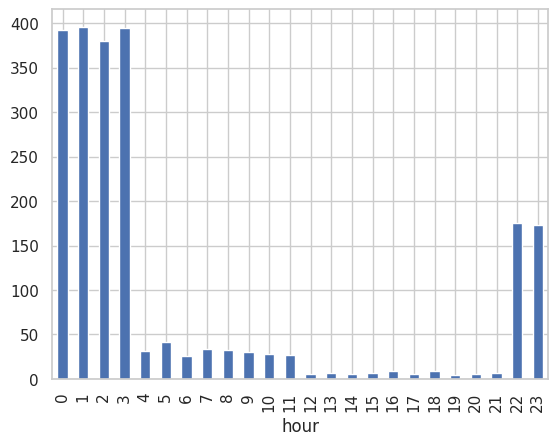

In [ ]:
# Filter khusus kategori grocery_pos yang fraud
grocery_maling = df_fraud[df_fraud['category'] == 'grocery_pos']

# Liat sebaran jamnya
grocery_maling['hour'].value_counts().sort_index().plot(kind='bar')

Analysis Finding
- Overall, fraudulent activities are most prevalent in the grocery_pos and shopping_net categories, which represent the highest total volume of fraud cases in the dataset.
- There is a significant shift in perpetrator behavior based on the time of day.
- Conversely, physical grocery fraud (grocery_pos) shows an unexpected surge during the early morning hours (12 AM – 3 AM), where case counts nearly double compared to their 10 PM frequency.


### C. Amount Distribution: The "Economic Impact"

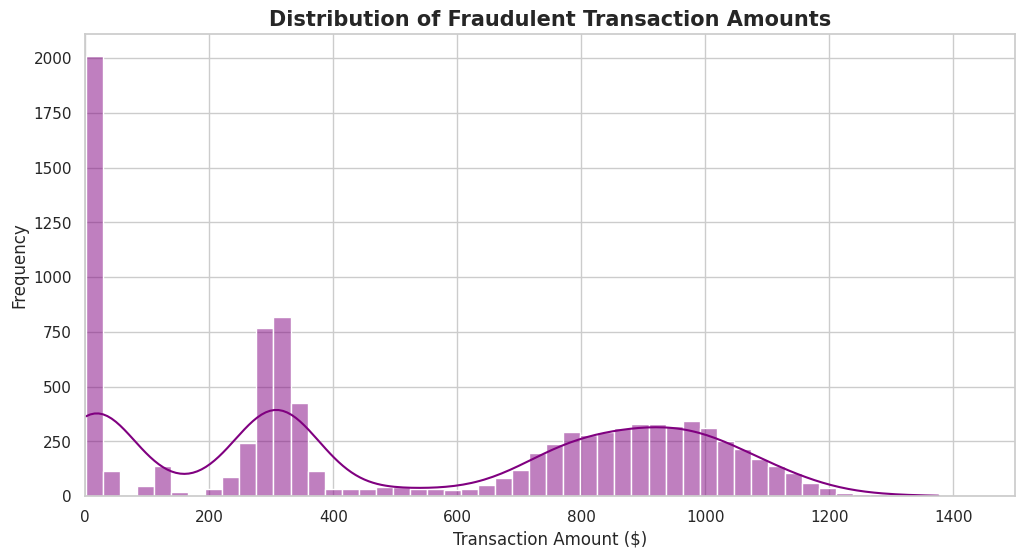

In [ ]:
plt.figure(figsize=(12, 6))
# Focus on non-zero amounts to remove pre-auth noise
sns.histplot(df_fraud[df_fraud['amt'] > 0]['amt'], bins=50, kde=True, color='purple')
plt.title('Distribution of Fraudulent Transaction Amounts', fontsize=15, fontweight='bold')
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 1500) # Focusing on the core distribution
plt.show()

Analysis Finding
- The distribution of fraudulent transaction amounts is distinctly bimodal, meaning it has two primary peaks rather than a standard normal curve.
- A significant volume of fraud cases occurs at low denominations (under 100 dollar), with a massive spike in the first bin (approximately 0–28 dollar). This behavior likely represents "card testing" to verify if a stolen credential is still active before attempting larger purchases.
- A second, broader peak is observed between $800 and $1,100. This indicates a deliberate strategy to maximize the value stolen in a single transaction once the card's validity is confirmed.
- Despite the high frequency of small-value "test" transactions, the average fraudulent amount remains high at approximately 651.56 dollar. This is driven by the sheer volume of high-value "greed" transactions in the $800+ range.
- Operational Conclusion: Detection systems should not only flag high-value anomalies but also prioritize the identification of low-value, rapid-succession "test" transactions, which serve as leading indicators for high-impact fraud events.

### D. Demographics: The "Vulnerability Profile"

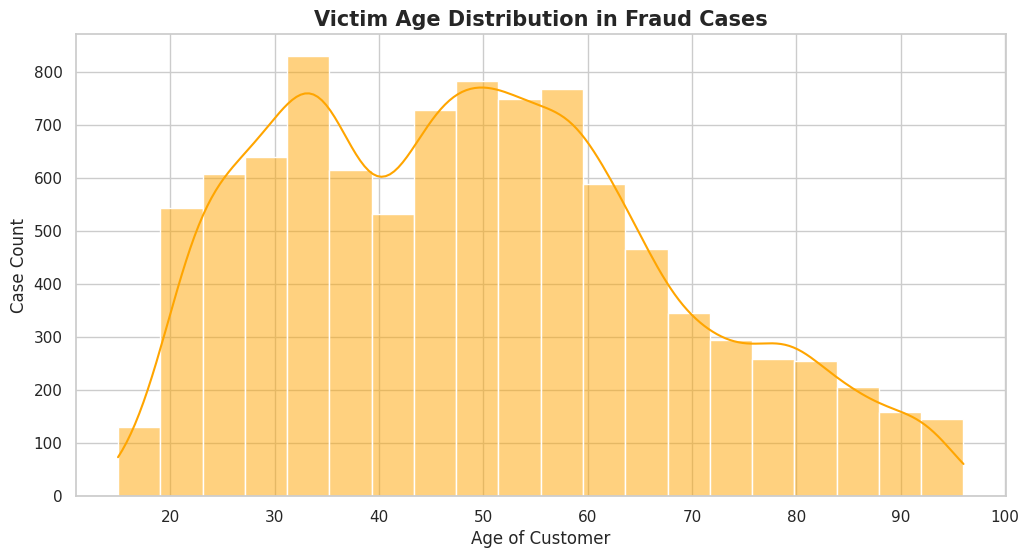

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_fraud['age'], bins=20, kde=True, color='orange')
plt.title('Victim Age Distribution in Fraud Cases', fontsize=15, fontweight='bold')
plt.xlabel('Age of Customer', fontsize=12)
plt.ylabel('Case Count', fontsize=12)
plt.show()

Analysis Finding
- The analysis identifies a significant concentration of fraud victims within the Senior and Baby Boomer demographics (Aged 50+).
- This age group is likely targeted due to higher accumulated wealth and significantly higher credit limits compared to younger demographics, providing a "high-yield" opportunity for perpetrators.
- Actionable Strategy: Financial institutions should consider implementing Enhanced Verification Measures (such as mandatory SMS/Push confirmation) for high-value transactions initiated by this demographic, especially when occurring during the high-risk "Critical Window" (10 PM – 3 AM).